In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.drop('User ID',axis=1, inplace = True)

In [6]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [12]:
X_test

,Gender,Age,EstimatedSalary
209,0,46,22000
280,0,59,88000
33,0,28,44000
210,0,48,96000
93,0,29,28000
...,...,...,...
246,0,35,50000
227,1,56,133000
369,0,54,26000
176,0,35,47000


In [13]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

# Feature scalling: StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [20]:
X_train_scaled = pd.DataFrame(data=X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled , columns=X_train.columns)

In [17]:
np.round(X_train.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.5,37.87,70281.25
std,0.5,10.21,34430.55
min,0.0,18.00,15000.00
25%,0.0,30.00,43000.00
50%,0.5,37.00,71000.00
75%,1.0,45.00,88000.00
max,1.0,60.00,150000.00


In [18]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.0,-0.00,0.00
std,1.0,1.00,1.00
min,-1.0,-1.95,-1.61
25%,-1.0,-0.77,-0.79
50%,0.0,-0.09,0.02
75%,1.0,0.70,0.52
max,1.0,2.17,2.32


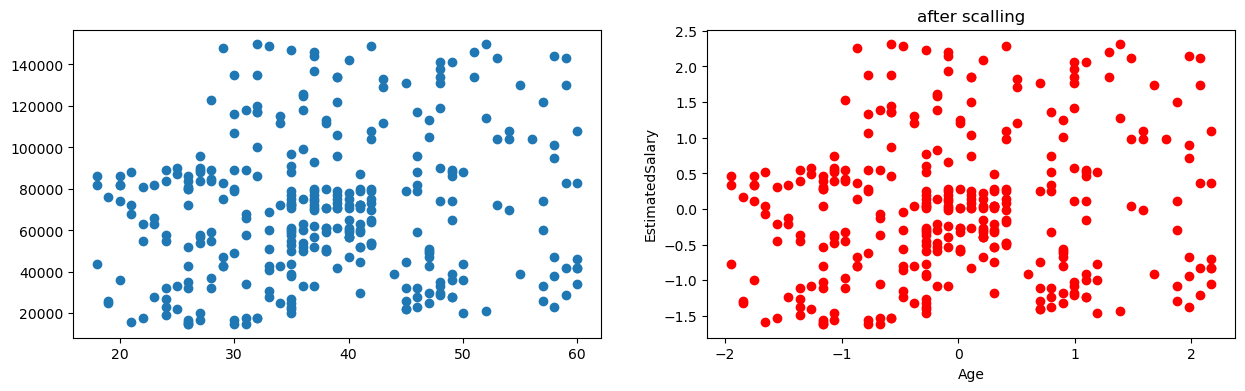

In [19]:
fig,(x1,x2) = plt.subplots(1,2, figsize=(15,4))
x1.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title('before scalling')

x2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
plt.title('after scalling')

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

plt.show()

# When to use standard scaler

# Algorithms that do not require Feature Scalling